In [14]:
# autor: Łukasz Machnik
from pulp import LpMaximize, LpMinimize, LpProblem, LpStatus, lpSum, LpVariable
import networkx as nx

(0, 1)  	c=1	t=6
(1, 2)  	c=2	t=5
(1, 3)  	c=3	t=4
(2, 0)  	c=4	t=3
(2, 5)  	c=5	t=2
(3, 7)  	c=6	t=1
(3, 4)  	c=1	t=6
(4, 1)  	c=2	t=5
(4, 5)  	c=3	t=4
(5, 6)  	c=4	t=3
(5, 8)  	c=5	t=2
(5, 9)  	c=6	t=1
(6, 2)  	c=1	t=6
(7, 4)  	c=2	t=5
(7, 8)  	c=3	t=4
(7, 10)  	c=4	t=3
(8, 4)  	c=5	t=2
(8, 9)  	c=6	t=1
(8, 11)  	c=1	t=6
(9, 6)  	c=2	t=5
(9, 12)  	c=3	t=4
(10, 11)  	c=4	t=3
(10, 14)  	c=5	t=2
(11, 7)  	c=6	t=1
(11, 12)  	c=1	t=6
(11, 14)  	c=2	t=5
(12, 8)  	c=3	t=4
(12, 13)  	c=4	t=3
(12, 15)  	c=5	t=2
(13, 9)  	c=6	t=1
(14, 15)  	c=1	t=6
(15, 13)  	c=2	t=5
[1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2]
[6, 5, 4, 3, 2, 1, 6, 5, 4, 3, 2, 1, 6, 5, 4, 3, 2, 1, 6, 5, 4, 3, 2, 1, 6, 5, 4, 3, 2, 1, 6, 5]


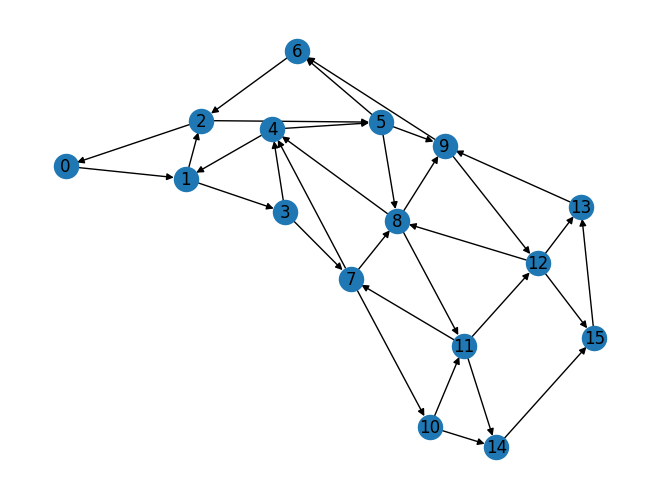

In [15]:
n = 16
edge = [(0, 1), (1, 2), (1, 3), (2, 0), (2, 5), (3, 7), (3, 4), (4, 1), (4, 5), (5, 6), (5, 8), (5, 9), (6, 2), (7, 4), (7, 8), (7, 10), (8, 4), (8, 9), (8, 11), (9, 6), (9, 12), (10, 11), (10, 14), (11, 7), (11, 12), (11, 14), (12, 8), (12, 13), (12, 15), (13, 9), (14, 15), (15, 13)]
G = nx.DiGraph()
G.add_nodes_from(range(n))
G.add_edges_from(edge)
m = G.number_of_edges()
cost = [i % 6 + 1 for i in range(m)] 
time = [7 - cost[i] for i in range(m)]
T = 30
for i in range(m):
    print("%s  \tc=%s\tt=%s" % (edge[i], cost[i], time[i]))
print(cost)
print(time)
nx.draw(G, with_labels=True)

In [21]:
isEdgeChosen = [LpVariable("czy_sciezka_(%s, %s)_uzyta" % (edge[i][0], edge[i][1]), cat="Binary") for i in range(m)]
model = LpProblem(name="szukanie-sciezki", sense=LpMinimize)
nodeBilance = [0 for i in range(n)]
for i in range(m):
    a = edge[i][0]
    b = edge[i][1]
    c = isEdgeChosen[i]
    nodeBilance[a] += 1 * isEdgeChosen[i]
    nodeBilance[b] += -1 * isEdgeChosen[i]
    st = isEdgeChosen[i] * time[i]
    sc = isEdgeChosen[i] * cost[i]
model += (st <= T, "ograniczenie_czasu")
model += sc
for i in range(1, n - 1):
    model += (nodeBilance[i] == 0, "wyjscie+wejscie_%s" % i)
model += (nodeBilance[0] == 1, "zrodlo")
model += (nodeBilance[n - 1] == -1, "cel")

status = model.solve()

In [22]:
for var in model.variables():
    if(var.value() == 1):
        print("%s = %s" % (var.name, var.value()))

czy_sciezka_(0,_1)_uzyta = 1.0
czy_sciezka_(1,_2)_uzyta = 1.0
czy_sciezka_(12,_15)_uzyta = 1.0
czy_sciezka_(2,_5)_uzyta = 1.0
czy_sciezka_(5,_9)_uzyta = 1.0
czy_sciezka_(9,_12)_uzyta = 1.0
